# Impossibility of the Cylindrically Symmetric Einstein-Straus Model by Senovilla and Vera
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

We'll come back and calculate the interior and exterior metrics later

https://www.researchgate.net/profile/Jose-Senovilla/publication/238978844_Impossibility_of_the_Cylindrically_Symmetric_Einstein-Straus_Model/links/00b7d5214a1a0e7bea000000/Impossibility-of-the-Cylindrically-Symmetric-Einstein-Straus-Model.pdf

https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.17.120

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' ) 

In [5]:
A = Function('A')(t,r)
A

In [6]:
B = Function('B')(t,r)
B

In [7]:
C = Function('C')(t,r)
C

In [8]:
D = Function('D')(t,r)
D

In [9]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [10]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [11]:
lineElement = -A**2 * dt**2 + B**2 * dr**2 + C**2 *dphi**2 + D**2 *dz**2
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2                                    ⎤
⎢-A (t, r)     0         0         0    ⎥
⎢                                       ⎥
⎢            2                          ⎥
⎢    0      B (t, r)     0         0    ⎥
⎢                                       ⎥
⎢                      2                ⎥
⎢    0         0      C (t, r)     0    ⎥
⎢                                       ⎥
⎢                                2      ⎥
⎣    0         0         0      D (t, r)⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  2                                    ⎤
⎢-A (t, r)     0         0         0    ⎥
⎢                                       ⎥
⎢            2                          ⎥
⎢    0      B (t, r)     0         0    ⎥
⎢                                       ⎥
⎢                      2                ⎥
⎢    0         0      C (t, r)     0    ⎥
⎢                                       ⎥
⎢                                2      ⎥
⎣    0         0         0      D (t, r)⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                ∂                                                        ⎤  ⎡        ∂            ∂                                   
⎢⎢──(A(t, r))      ──(A(t, r))                                              ⎥  ⎢A(t, r)⋅──(A(t, r))  ──(B(t, r))                         
⎢⎢∂t               ∂r                                                       ⎥  ⎢        ∂r           ∂t                                  
⎢⎢───────────      ───────────               0                    0         ⎥  ⎢───────────────────  ───────────            0            
⎢⎢  A(t, r)          A(t, r)                                                ⎥  ⎢       2               B(t, r)                           
⎢⎢                                                                          ⎥  ⎢      B (t, r)                                           
⎢⎢∂                    ∂                                                    ⎥  ⎢                                                         
⎢⎢──(A(t, r))  B(t, r)⋅──(B(t, r))

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡          2                                                                                                                    2        
⎢         ∂                                                                                                                    ∂         
⎢A(t, r)⋅───(A(t, r))           ∂           ∂                     ∂           ∂                     ∂           ∂             ───(D(t, r)
⎢          2            A(t, r)⋅──(A(t, r))⋅──(D(t, r))   A(t, r)⋅──(A(t, r))⋅──(C(t, r))   A(t, r)⋅──(A(t, r))⋅──(B(t, r))     2        
⎢        ∂r                     ∂r          ∂r                    ∂r          ∂r                    ∂r          ∂r            ∂t         
⎢──────────────────── + ─────────────────────────────── + ─────────────────────────────── - ─────────────────────────────── - ───────────
⎢       2                        2                                 2                                     3                      D(t, r)  
⎢      B (t, r)                 B 

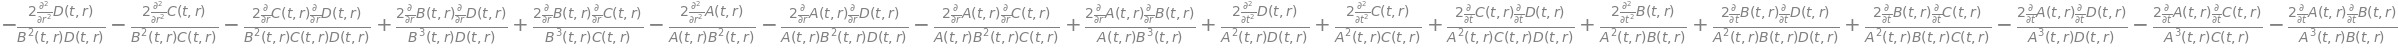

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡    ⎛       2                  2                                                                                                      2 
⎢    ⎜      ∂                  ∂                                                                                                      ∂  
⎢    ⎜   2⋅───(D(t, r))     2⋅───(C(t, r))      ∂           ∂               ∂           ∂               ∂           ∂              2⋅───(
⎢    ⎜       2                  2             2⋅──(C(t, r))⋅──(D(t, r))   2⋅──(B(t, r))⋅──(D(t, r))   2⋅──(B(t, r))⋅──(C(t, r))        2 
⎢    ⎜     ∂r                 ∂r                ∂r          ∂r              ∂r          ∂r              ∂r          ∂r               ∂r  
⎢0.5⋅⎜- ──────────────── - ──────────────── - ───────────────────────── + ───────────────────────── + ───────────────────────── - ───────
⎢    ⎜   2                  2                   2                               3                           3                            
⎢    ⎝  B (t, r)⋅D(t, r)   B (t, r

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡          2                                                                                                                    2        
⎢         ∂                                                                                                                    ∂         
⎢A(t, r)⋅───(A(t, r))           ∂           ∂                     ∂           ∂                     ∂           ∂             ───(D(t, r)
⎢          2            A(t, r)⋅──(A(t, r))⋅──(D(t, r))   A(t, r)⋅──(A(t, r))⋅──(C(t, r))   A(t, r)⋅──(A(t, r))⋅──(B(t, r))     2        
⎢        ∂r                     ∂r          ∂r                    ∂r          ∂r                    ∂r          ∂r            ∂t         
⎢──────────────────── + ─────────────────────────────── + ─────────────────────────────── - ─────────────────────────────── - ───────────
⎢       2                        2                                 2                                     3                      D(t, r)  
⎢      B (t, r)                 B 

In [25]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡    ⎛                             2                                       2                                                             
⎢    ⎜   2                        ∂              2                        ∂              2               ∂           ∂              2    
⎢1.0⋅⎜- A (t, r)⋅B(t, r)⋅C(t, r)⋅───(D(t, r)) - A (t, r)⋅B(t, r)⋅D(t, r)⋅───(C(t, r)) - A (t, r)⋅B(t, r)⋅──(C(t, r))⋅──(D(t, r)) + A (t, 
⎢    ⎜                             2                                       2                             ∂r          ∂r                  
⎢    ⎝                           ∂r                                      ∂r                                                              
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                                                        
⎢                                 

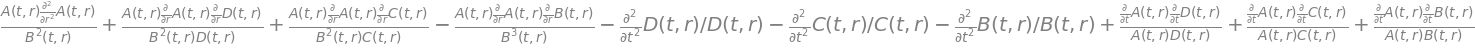

In [26]:
ricciSimplified[0,0]

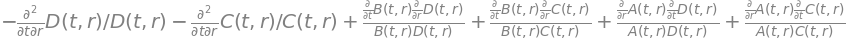

In [27]:
ricciSimplified[1,0]

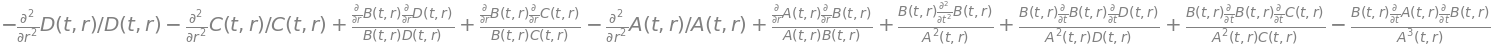

In [28]:
ricciSimplified[1,1]

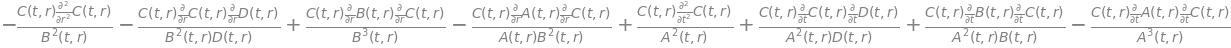

In [29]:
ricciSimplified[2,2]

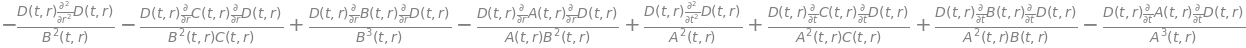

In [30]:
ricciSimplified[3,3]